In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv("train.csv")
df = df.drop(columns = ['PassengerId','Cabin','Name'], axis = 1)

In [107]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


**1. Load the training data, how many numerical features do you have? (if you are using Orange, manually set up CryoSleep, VIP, and Transported as Categorical)**

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


**answer:** 6 numerical features

**2. How many observations do you have in a training set?**

In [109]:
len(df)

8693

**answer:** 8693

**3. Select Age groups with a prevalent number of Transported passengers (hint: plot histogram)**

20 <= Age < 40

Age >= 60

Age < 20

40 <= Age < 60

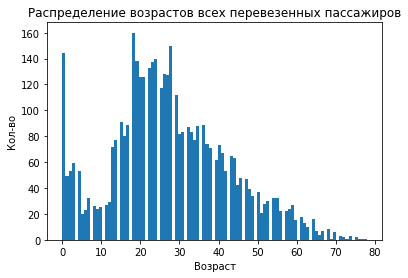

In [110]:
plt.hist(df.Age[df.Transported==True], bins=100)
plt.title('Распределение возрастов всех перевезенных пассажиров')
plt.xlabel("Возраст")
plt.ylabel("Кол-во")
plt.show()

In [111]:
filter_age_20 = df.Age < 20
filter_age_20_40 = (df.Age >= 20)&(df.Age < 40) 
filter_age_40_60 = (df.Age >= 40)&(df.Age < 60) 
filter_age_60 = df.Age >= 60
print('Age < 20:',len(df.loc[filter_age_20][df.Transported==True]))
print('20 <= Age < 40:',len(df.loc[filter_age_20_40][df.Transported==True]))
print('40 <= Age < 60:',len(df.loc[filter_age_40_60][df.Transported==True]))
print('Age >= 60:',len(df.loc[filter_age_60][df.Transported==True]))

Age < 20: 1271
20 <= Age < 40: 2092
40 <= Age < 60: 806
Age >= 60: 119


**answer:** 20 <= Age < 40

**4. Which HomePlanet has the highest percentage of Transported passengers**

In [112]:
df[df.Transported].groupby('HomePlanet').count().Transported / df.groupby('HomePlanet').count().Transported*100

HomePlanet
Earth     42.394611
Europa    65.884561
Mars      52.302445
Name: Transported, dtype: float64

**answer:** Europa

**5. Does CryoSleep increase the chances of being Transported?**

In [113]:
print('Transported=True & CryoSleep=True:',len(df[(df.Transported)&(df.CryoSleep==True)]))
#print('Transported=False & CryoSleep=True:',len(df[(df.Transported==False)&(df.CryoSleep==True)]))
print('Transported=True & CryoSleep=False:',len(df[(df.Transported)&(df.CryoSleep==False)]))
#print('Transported=False & CryoSleep=False:',len(df[(df.Transported==False)&(df.CryoSleep==False)]))
print('CryoSleep=True:',len(df[(df.CryoSleep==True)]))
print('CryoSleep=False:',len(df[(df.CryoSleep==False)]))

Transported=True & CryoSleep=True: 2483
Transported=True & CryoSleep=False: 1789
CryoSleep=True: 3037
CryoSleep=False: 5439


In [114]:
print('P(Transported=True|CryoSleep=True) =',len(df[(df.Transported)&(df.CryoSleep==True)])/len(df[(df.CryoSleep==True)]))
print('P(Transported=True|CryoSleep=False) =',len(df[(df.Transported)&(df.CryoSleep==False)])/len(df[(df.CryoSleep==False)]))

P(Transported=True|CryoSleep=True) = 0.8175831412578202
P(Transported=True|CryoSleep=False) = 0.3289207574921861


**answer:** yes

**6. (If you are using Orange read KNN documentation) Read about one-hot encoding https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/ . What is one-hot-encoding?**

**answer:** Replace feature with k binary features.

**7.  Construct a simple pipeline: Impute missing values (for numerical features use 0, except for Age, for Age use mean imputation; for categorical features impute with the most frequent value), Standardize numerical features (zero mean and unit variance), Use KNN with 10 neighbors. Use 3-fold cross-validation. What is your average classification accuracy? (integer number 0-100)**

In [115]:
df1 = df.copy()

X=df1.drop('Transported', axis=1)
y=df1.Transported

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

In [116]:
X_train.isna().sum()

HomePlanet      145
CryoSleep       148
Destination     121
Age             113
VIP             141
RoomService     122
FoodCourt       128
ShoppingMall    140
Spa             122
VRDeck          126
dtype: int64

In [117]:
X_train['Age'] = X_train.Age.fillna(X_train.Age.mean())
X_train['RoomService'] = X_train.RoomService.fillna(0)
X_train['FoodCourt'] = X_train.FoodCourt.fillna(0)
X_train['ShoppingMall'] = X_train.ShoppingMall.fillna(0)
X_train['Spa'] = X_train.Spa.fillna(0)
X_train['VRDeck'] = X_train.VRDeck.fillna(0)
HomePlanet_top = X_train.HomePlanet.value_counts().idxmax()
X_train['HomePlanet'] = X_train.HomePlanet.fillna(HomePlanet_top)
CryoSleep_top = X_train.CryoSleep.value_counts().idxmax()
X_train['CryoSleep'] = X_train.CryoSleep.fillna(CryoSleep_top)
Destination_top = X_train.Destination.value_counts().idxmax()
X_train['Destination'] = X_train.Destination.fillna(Destination_top)
VIP_top = X_train.VIP.value_counts().idxmax()
X_train['VIP'] = X_train.VIP.fillna(VIP_top)

In [118]:
X_train = pd.concat([X_train,pd.get_dummies(X_train['HomePlanet'],prefix='HomePlanet')], axis=1).drop('HomePlanet',axis=1)
X_train = pd.concat([X_train,pd.get_dummies(X_train['Destination'],prefix='Destination')], axis=1).drop('Destination',axis=1)

In [119]:
numerical_columns = [c for c in X_train.columns if X_train[c].dtype.name == 'float64']
arr_std = np.array(np.std(X_train[numerical_columns], axis=0))
arr_mean = np.array(np.mean(X_train[numerical_columns], axis=0))

for i in range(len(numerical_columns)):
    X_train[numerical_columns[i]] = (X_train[numerical_columns[i]] - arr_mean[i])/arr_std[i]

In [120]:
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
8123,False,-0.549869,False,6.989504,-0.278701,-0.214441,-0.275016,-0.264084,0,0,1,0,0,1
6089,True,1.808392,False,-0.327001,-0.278701,-0.300316,-0.276871,-0.264084,1,0,0,0,1,0
328,False,-0.341787,False,-0.327001,-0.278701,0.737194,-0.112670,-0.210362,1,0,0,0,0,1
8573,True,-1.937082,False,-0.327001,-0.278701,-0.300316,-0.276871,-0.264084,1,0,0,0,1,0
1271,False,-1.035393,False,1.885484,-0.277471,-0.079495,0.149866,-0.197395,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,False,0.282458,False,0.267353,-0.112721,-0.242482,-0.276871,-0.264084,1,0,0,0,1,0
163,True,1.877753,False,-0.327001,-0.278701,-0.300316,-0.276871,-0.264084,1,0,0,0,0,1
6012,True,-1.382197,False,-0.327001,-0.278701,-0.300316,-0.276871,-0.264084,1,0,0,0,0,1
6558,True,-0.341787,False,-0.327001,-0.278701,-0.300316,-0.276871,-0.264084,0,1,0,1,0,0


In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier(n_neighbors=10)
cv_results = cross_validate(knn, X_train, y_train, cv=3, scoring='accuracy', return_train_score=True)

In [122]:
int(np.round(cv_results['train_score'].mean()*100,0))

81

In [123]:
int(np.round(cv_results['test_score'].mean()*100,0))

77

In [124]:
print('answer:',int(np.round(cv_results['test_score'].mean()*100,0)))

answer: 77


**8. Build a Confusion Matrix of your prediction on test folds. What are your specificity and sensitivity? (two integers 0-100, divided by a comma)** 

In [125]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [126]:
X_test['Age'] = X_test.Age.fillna(X_test.Age.mean())
X_test['RoomService'] = X_test.RoomService.fillna(0)
X_test['FoodCourt'] = X_test.FoodCourt.fillna(0)
X_test['ShoppingMall'] = X_test.ShoppingMall.fillna(0)
X_test['Spa'] = X_test.Spa.fillna(0)
X_test['VRDeck'] = X_test.VRDeck.fillna(0)
X_test['HomePlanet'] = X_test.HomePlanet.fillna(HomePlanet_top)
X_test['CryoSleep'] = X_test.CryoSleep.fillna(CryoSleep_top)
X_test['Destination'] = X_test.Destination.fillna(Destination_top)
X_test['VIP'] = X_test.VIP.fillna(VIP_top)

In [127]:
X_test = pd.concat([X_test,pd.get_dummies(X_test['HomePlanet'],prefix='HomePlanet')], axis=1).drop('HomePlanet',axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Destination'],prefix='Destination')], axis=1).drop('Destination',axis=1)

In [128]:
for i in range(len(numerical_columns)):
    X_test[numerical_columns[i]] = (X_test[numerical_columns[i]] - arr_mean[i])/arr_std[i]

In [129]:
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)

In [130]:
accuracy_score(y_test, y_test_predict)

0.7786685256186825

In [131]:
matr = confusion_matrix(y_test, y_test_predict)
matr

array([[1163,  292],
       [ 343, 1071]])

In [132]:
# confusion_matrix(true, pred)
# TN 0 0    FP 0 1
# FN 1 0    TP 1 1

In [133]:
# specificity = TN / (TN + FP)
specificity = matr[0][0] / sum(matr[0])
# sensitivity = TP / (TP + FN)
sensitivity = matr[1][1] / sum(matr[1])
print('specificity', specificity)
print('sensitivity', sensitivity)

specificity 0.7993127147766323
sensitivity 0.7574257425742574


In [135]:
print('answer',int(np.round(specificity*100,0)),',',int(np.round(sensitivity*100,0)))

answer 80 , 76


**9. Try different values of k for KNN: 3, 5, 10, 15, 30, 50, which k yields the best result in terms of classification accuracy on 3-fold cross-validation?**

In [99]:
from sklearn.model_selection import GridSearchCV
n_neighbors_array = [3, 5, 10, 15, 30, 50]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)
print('best parameter:', grid.best_params_)
print('best score:', grid.best_score_)

best parameter: {'n_neighbors': 50}
best score: 0.777474153061074


In [100]:
best_rez_test_score = []
n_neighbors_array = [3, 5, 10, 15, 30, 50]
for i in n_neighbors_array:
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_results = cross_validate(knn, X_train, y_train, cv=3, return_train_score=True)
    best_rez_test_score.append(cv_results['test_score'].mean())
best_neighbor = n_neighbors_array[best_rez_test_score.index(np.max(best_rez_test_score))]
print('best parameter:', best_neighbor, '\nbest score:', np.max(best_rez_test_score))

best parameter: 50 
best score: 0.7791894000371057


**10. If you are minimizing the number of False Positives, which k should you use?**

In [35]:
# confusion_matrix(true, pred)
# TN 0 0    FP 0 1
# FN 1 0    TP 1 1

In [36]:
best_rez_test = []
n_neighbors_array = [3, 5, 10, 15, 30, 50]
for i in n_neighbors_array:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_test_predict = knn.predict(X_test)
    best_rez_test.append(confusion_matrix(y_test, y_test_predict)[0][1])
print('best neighbors:',n_neighbors_array[best_rez_test.index(np.min(best_rez_test))],'\nmin FP:',np.min(best_rez_test))

best neighbors: 10 
min FP: 292


**11. For the best model in terms of classification accuracy load test data, make predictions and submit them on kaggle, does the performance of your model differ on cross-validation and on the test set, which is better?**

In [37]:
df1 = df.copy()

X_train=df1.drop('Transported', axis=1)
y_train=df1.Transported

In [38]:
#repeat algorithm
X_train['Age'] = X_train.Age.fillna(X_train.Age.mean())
X_train['RoomService'] = X_train.RoomService.fillna(0)
X_train['FoodCourt'] = X_train.FoodCourt.fillna(0)
X_train['ShoppingMall'] = X_train.ShoppingMall.fillna(0)
X_train['Spa'] = X_train.Spa.fillna(0)
X_train['VRDeck'] = X_train.VRDeck.fillna(0)
HomePlanet_top = X_train.HomePlanet.value_counts().idxmax()
X_train['HomePlanet'] = X_train.HomePlanet.fillna(HomePlanet_top)
CryoSleep_top = X_train.CryoSleep.value_counts().idxmax()
X_train['CryoSleep'] = X_train.CryoSleep.fillna(CryoSleep_top)
Destination_top = X_train.Destination.value_counts().idxmax()
X_train['Destination'] = X_train.Destination.fillna(Destination_top)
VIP_top = X_train.VIP.value_counts().idxmax()
X_train['VIP'] = X_train.VIP.fillna(VIP_top)

X_train = pd.concat([X_train,pd.get_dummies(X_train['HomePlanet'],prefix='HomePlanet')], axis=1).drop('HomePlanet',axis=1)
X_train = pd.concat([X_train,pd.get_dummies(X_train['Destination'],prefix='Destination')], axis=1).drop('Destination',axis=1)

numerical_columns = [c for c in X_train.columns if X_train[c].dtype.name == 'float64']
arr_std = np.array(np.std(X_train[numerical_columns], axis=0))
arr_mean = np.array(np.mean(X_train[numerical_columns], axis=0))

for i in range(len(numerical_columns)):
    X_train[numerical_columns[i]] = (X_train[numerical_columns[i]] - arr_mean[i])/arr_std[i]

In [39]:
knn_best = KNeighborsClassifier(n_neighbors=best_neighbor)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [40]:
df = pd.read_csv("test.csv")
df_id = df['PassengerId']
X_test = df.drop(columns = ['PassengerId','Cabin','Name'], axis = 1)

In [41]:
X_test['Age'] = X_test.Age.fillna(X_test.Age.mean())
X_test['RoomService'] = X_test.RoomService.fillna(0)
X_test['FoodCourt'] = X_test.FoodCourt.fillna(0)
X_test['ShoppingMall'] = X_test.ShoppingMall.fillna(0)
X_test['Spa'] = X_test.Spa.fillna(0)
X_test['VRDeck'] = X_test.VRDeck.fillna(0)
X_test['HomePlanet'] = X_test.HomePlanet.fillna(HomePlanet_top)
X_test['CryoSleep'] = X_test.CryoSleep.fillna(CryoSleep_top)
X_test['Destination'] = X_test.Destination.fillna(Destination_top)
X_test['VIP'] = X_test.VIP.fillna(VIP_top)

X_test = pd.concat([X_test,pd.get_dummies(X_test['HomePlanet'],prefix='HomePlanet')], axis=1).drop('HomePlanet',axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test['Destination'],prefix='Destination')], axis=1).drop('Destination',axis=1)

for i in range(len(numerical_columns)):
    X_test[numerical_columns[i]] = (X_test[numerical_columns[i]] - arr_mean[i])/arr_std[i]

In [42]:
y_rez_predict = knn_best.predict(X_test)

In [43]:
df_rez = pd.DataFrame({'PassengerId':np.array(df_id), 'Transported': y_rez_predict})

In [44]:
df_rez.to_csv('df_rez1', index=False)

In [45]:
print('best parameter:', best_neighbor, '\nbest score:', np.max(best_rez_test_score))

best parameter: 50 
best score: 0.7791894000371057


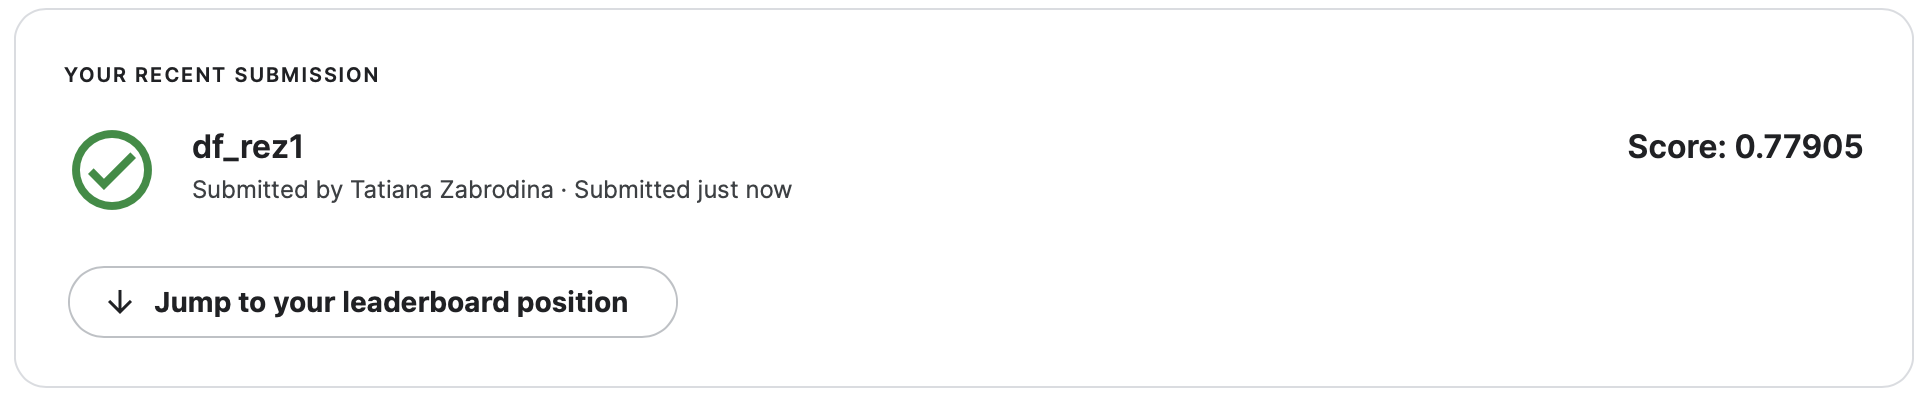

In [136]:
rez_kaggle = 0.77905